In [4]:
import tensorflow as tf
import cv2   
mnist = tf.keras.datasets.mnist

In [5]:
### After loading the MNIST dataset, divide into training and testing datasets

In [6]:
##unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

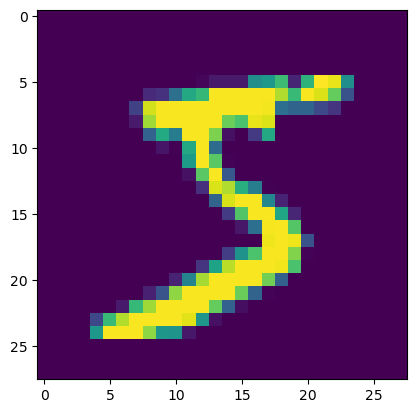

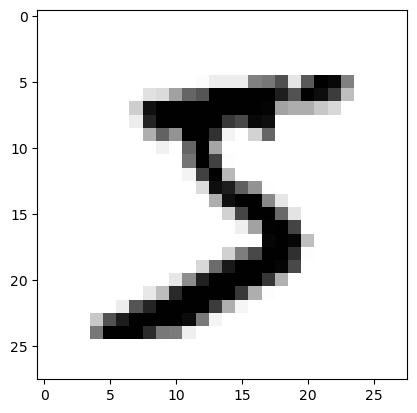

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [9]:
### Checking the values of each pixel
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

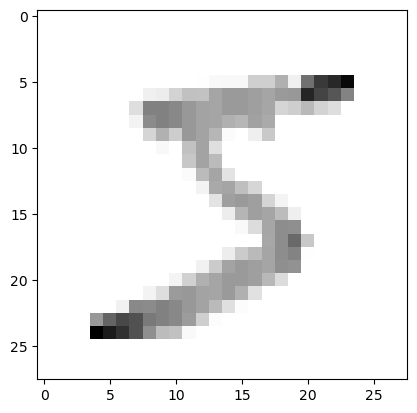

In [10]:
### Normalize the data

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [11]:
print(y_train[0])

5


In [12]:
### Resizing the data to make it suitable for the CNN model

import numpy as np
IMG_SIZE = 28

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # increase the dimension of the data
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # increase the dimension of the data

print("Training data shape: ", x_trainr.shape)
print("Testing data shape: ", x_testr.shape)



Training data shape:  (60000, 28, 28, 1)
Testing data shape:  (10000, 28, 28, 1)


In [13]:
# Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation

### Creating the model
model = Sequential()

##### First layer
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))  # only for the first layer we need to specify the input shape
model.add(Activation("relu"))   # activation function
model.add(MaxPooling2D(pool_size = (2, 2)))  # pool size is the size of the window to take the maximum value

##### Second layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

##### Third layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

##### Fully connected layer #1
model.add(Flatten())  # Flatten the data to feed it into the dense layer, from 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

##### Last fully connected layer, output must be equal to the number of classes
model.add(Dense(10))  # 10 because there are 10 classes
model.add(Activation("softmax"))  # softmax is used for classification problems


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Total training samples: ", len(x_trainr))

Total training samples:  60000


In [16]:
### Training the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:

model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) ### training the model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.7893 - loss: 0.6408 - val_accuracy: 0.9504 - val_loss: 0.1569
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9679 - loss: 0.1050 - val_accuracy: 0.9696 - val_loss: 0.0992
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9767 - loss: 0.0736 - val_accuracy: 0.9760 - val_loss: 0.0763
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9818 - loss: 0.0573 - val_accuracy: 0.9796 - val_loss: 0.0648
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9875 - loss: 0.0414 - val_accuracy: 0.9773 - val_loss: 0.0776


In [18]:
### Evaluating the model
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10000 samples: ", test_loss)
print("Test accuracy on 10000 samples: ", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0851
Test loss on 10000 samples:  0.07085951417684555
Test accuracy on 10000 samples:  0.9797999858856201


In [ ]:
predictions = model.predict([x_testr])
print(predictions)


 44/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*',)
  warnings.warn(


288/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [ ]:
### in order to understand the predictions, we need to convert the predictions into the actual numbers
print(np.argmax(predictions[0]))  ### the prediction is an array of 10 numbers, 
                                    ### we need to find the index of the maximum value which is the predicted number

plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predictions[1923]))
plt.imshow(x_test[1923])

In [ ]:
import os
path = os.path.dirname(os.path.realpath("testing.ipynb"))


img = cv2.imread(f"{path}/eight.png")

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
# Invert colors if background is white (checking mean pixel value)
if np.mean(img) > 127:
    img = 255 - img  # Invert the colors


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
gray.shape


In [ ]:
resized_img.shape

In [ ]:
plt.imshow(resized_img)

In [ ]:
resized_img

In [ ]:
newimg = tf.keras.utils.normalize(resized_img, axis = 1) ### 0 to 1 normalization

In [ ]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### kernel operation of convolution

In [ ]:
plt.imshow(newimg[0])
plt.show()

In [ ]:
newimg.shape

In [ ]:
predictions = model.predict([newimg])

In [ ]:
print(np.argmax(predictions))
plt.imshow(img)
